Nama : Zalfa' Putri Nabilah                 <br>
Group: Group 1                 <br>
Cita-cita masa kecil: News Anchor

# No. 1

In [77]:
# import data
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [78]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [79]:
url = '/content/drive/MyDrive/Colab Notebooks/MSIB/Pengenalan Python untuk Data Science/PDA_DataSource/Pengolahan_Data/telecom_revenue.csv'
telecom_revenue = pd.read_csv(url)
telecom_revenue.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,OverageMinutes,RoamingCalls,Occupation
0,3164846,No,34.91,619.0,18.0,53.0,0.0,Other
1,3203230,Yes,43.24,405.0,40.0,0.0,0.0,Other
2,3371590,No,73.47,1281.0,71.0,0.0,0.0,Other
3,3138302,No,776.27,3978.0,160.0,2278.0,22.9,Other
4,3375774,No,189.20,1474.0,95.0,0.0,0.0,Other


In [80]:
# Filter dahulu sehingga kolom MonthlyRevenue dan TotalRecurringCharge sehingga tidak ada yang null dan tidak ada yang bernilai 0. 
telecom_filter = telecom_revenue[(telecom_revenue['MonthlyRevenue'].notnull()) & 
                (telecom_revenue['TotalRecurringCharge'].notnull()) &
                (telecom_revenue['MonthlyRevenue'] != 0) &
                (telecom_revenue['TotalRecurringCharge'] != 0)]

In [81]:
telecom_filter

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,OverageMinutes,RoamingCalls,Occupation
0,3164846,No,34.91,619.0,18.0,53.0,0.0,Other
1,3203230,Yes,43.24,405.0,40.0,0.0,0.0,Other
2,3371590,No,73.47,1281.0,71.0,0.0,0.0,Other
3,3138302,No,776.27,3978.0,160.0,2278.0,22.9,Other
4,3375774,No,189.20,1474.0,95.0,0.0,0.0,Other
...,...,...,...,...,...,...,...,...
9995,3267618,No,30.14,152.0,40.0,0.0,0.0,Other
9996,3316790,No,50.61,260.0,58.0,0.0,0.3,Other
9997,3265178,Yes,87.18,960.0,85.0,0.0,0.0,Other
9998,3282934,Yes,31.24,134.0,40.0,0.0,0.0,Clerical


In [82]:
# Buatlah kolom baru dinamakan revenue per recurring charge, merupakan pembagian MonthlyRevenue / TotalRecurringCharge
telecom_filter['revenue_per_recurring_charge'] = telecom_filter['MonthlyRevenue'] / telecom_filter['TotalRecurringCharge']

In [83]:
telecom_filter

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,OverageMinutes,RoamingCalls,Occupation,revenue_per_recurring_charge
0,3164846,No,34.91,619.0,18.0,53.0,0.0,Other,1.939444
1,3203230,Yes,43.24,405.0,40.0,0.0,0.0,Other,1.081000
2,3371590,No,73.47,1281.0,71.0,0.0,0.0,Other,1.034789
3,3138302,No,776.27,3978.0,160.0,2278.0,22.9,Other,4.851687
4,3375774,No,189.20,1474.0,95.0,0.0,0.0,Other,1.991579
...,...,...,...,...,...,...,...,...,...
9995,3267618,No,30.14,152.0,40.0,0.0,0.0,Other,0.753500
9996,3316790,No,50.61,260.0,58.0,0.0,0.3,Other,0.872586
9997,3265178,Yes,87.18,960.0,85.0,0.0,0.0,Other,1.025647
9998,3282934,Yes,31.24,134.0,40.0,0.0,0.0,Clerical,0.781000


In [84]:
# Hapus baris dimana kolom baru tersebut > 9 

# cek nilai yang diatas 9
telecom_filter.sort_values(['revenue_per_recurring_charge'], ascending=False).head(10)

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,OverageMinutes,RoamingCalls,Occupation,revenue_per_recurring_charge
6504,3351854,No,22.80,34.0,1.0,22.0,0.0,Other,22.800000
6935,3272234,No,450.08,2093.0,23.0,1090.0,9.1,Crafts,19.568696
8182,3007242,No,793.05,4661.0,43.0,2976.0,0.0,Other,18.443023
6037,3111850,No,84.05,79.0,5.0,79.0,0.0,Professional,16.810000
7597,3161118,No,81.12,78.0,5.0,75.0,0.7,Other,16.224000
5705,3042274,No,151.82,1313.0,10.0,331.0,0.0,Other,15.182000
7277,3276438,No,413.11,1734.0,29.0,873.0,4.4,Professional,14.245172
7330,3258614,Yes,136.36,423.0,10.0,114.0,0.0,Homemaker,13.636000
1198,3394342,No,123.95,1113.0,10.0,386.0,0.7,Other,12.395000
4216,3341778,Yes,123.31,1199.0,10.0,381.0,2.0,Professional,12.331000


In [85]:
# drop baris
telecom_revenue_drop = telecom_filter[~(telecom_filter['revenue_per_recurring_charge'] > 9)]
telecom_revenue_drop

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,OverageMinutes,RoamingCalls,Occupation,revenue_per_recurring_charge
0,3164846,No,34.91,619.0,18.0,53.0,0.0,Other,1.939444
1,3203230,Yes,43.24,405.0,40.0,0.0,0.0,Other,1.081000
2,3371590,No,73.47,1281.0,71.0,0.0,0.0,Other,1.034789
3,3138302,No,776.27,3978.0,160.0,2278.0,22.9,Other,4.851687
4,3375774,No,189.20,1474.0,95.0,0.0,0.0,Other,1.991579
...,...,...,...,...,...,...,...,...,...
9995,3267618,No,30.14,152.0,40.0,0.0,0.0,Other,0.753500
9996,3316790,No,50.61,260.0,58.0,0.0,0.3,Other,0.872586
9997,3265178,Yes,87.18,960.0,85.0,0.0,0.0,Other,1.025647
9998,3282934,Yes,31.24,134.0,40.0,0.0,0.0,Clerical,0.781000


In [86]:
# Buat lagi kolom baru dinamakan DailyRevenue, yang merupakan MonthlyRevenue /30
telecom_revenue_drop['DailyRevenue'] = telecom_revenue_drop['MonthlyRevenue'] / 30
telecom_revenue_drop

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,OverageMinutes,RoamingCalls,Occupation,revenue_per_recurring_charge,DailyRevenue
0,3164846,No,34.91,619.0,18.0,53.0,0.0,Other,1.939444,1.163667
1,3203230,Yes,43.24,405.0,40.0,0.0,0.0,Other,1.081000,1.441333
2,3371590,No,73.47,1281.0,71.0,0.0,0.0,Other,1.034789,2.449000
3,3138302,No,776.27,3978.0,160.0,2278.0,22.9,Other,4.851687,25.875667
4,3375774,No,189.20,1474.0,95.0,0.0,0.0,Other,1.991579,6.306667
...,...,...,...,...,...,...,...,...,...,...
9995,3267618,No,30.14,152.0,40.0,0.0,0.0,Other,0.753500,1.004667
9996,3316790,No,50.61,260.0,58.0,0.0,0.3,Other,0.872586,1.687000
9997,3265178,Yes,87.18,960.0,85.0,0.0,0.0,Other,1.025647,2.906000
9998,3282934,Yes,31.24,134.0,40.0,0.0,0.0,Clerical,0.781000,1.041333


In [87]:
# Setelah ke-4 steps dilakukan, berapa nilai tengah dari kolom DailyRevenue?
telecom_revenue_median = telecom_revenue_drop['DailyRevenue'].median()

print(f'Nilai tengah dari kolom DailyRevenue adalah: {telecom_revenue_median}')

Nilai tengah dari kolom DailyRevenue adalah: 1.6225


# No. 2

In [88]:
import pandas as pd

url = '/content/drive/MyDrive/Colab Notebooks/MSIB/Pengenalan Python untuk Data Science/PDA_DataSource/Pengolahan_Data/telecom_revenue.csv'
telecom_revenue = pd.read_csv(url)
telecom_revenue.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,OverageMinutes,RoamingCalls,Occupation
0,3164846,No,34.91,619.0,18.0,53.0,0.0,Other
1,3203230,Yes,43.24,405.0,40.0,0.0,0.0,Other
2,3371590,No,73.47,1281.0,71.0,0.0,0.0,Other
3,3138302,No,776.27,3978.0,160.0,2278.0,22.9,Other
4,3375774,No,189.20,1474.0,95.0,0.0,0.0,Other


In [89]:
# Churn rate didefinisikan sebagai total CustomerID yang churn = yes dibagi total customerID
telecom_revenue['Churn'].value_counts()

No     7120
Yes    2880
Name: Churn, dtype: int64

In [90]:
# Churn rate didefinisikan sebagai total CustomerID yang churn = yes dibagi total customerID
churn_rate = len(telecom_revenue[telecom_revenue['Churn'] == 'Yes']) / len(telecom_revenue['CustomerID'])
churn_rate

0.288

## Bagian A

In [91]:
telecom_group = telecom_revenue.groupby(['Occupation', 'Churn']).agg({'CustomerID' : 'count'}).reset_index()
telecom_group.rename(columns={'CustomerID': 'Customers'}, inplace=True)
telecom_group

,Occupation,Churn,Customers
0,Clerical,No,121
1,Clerical,Yes,55
2,Crafts,No,221
3,Crafts,Yes,84
4,Homemaker,No,25
5,Homemaker,Yes,8
6,Other,No,5239
7,Other,Yes,2170
8,Professional,No,1235
9,Professional,Yes,455


In [92]:
telecom_group['total_customers'] = telecom_group.groupby('Occupation')['Customers'].transform('sum')
telecom_group

,Occupation,Churn,Customers,total_customers
0,Clerical,No,121,176
1,Clerical,Yes,55,176
2,Crafts,No,221,305
3,Crafts,Yes,84,305
4,Homemaker,No,25,33
5,Homemaker,Yes,8,33
6,Other,No,5239,7409
7,Other,Yes,2170,7409
8,Professional,No,1235,1690
9,Professional,Yes,455,1690


In [93]:
churn_yes = telecom_group[telecom_group['Churn'] =='Yes']
churn_yes

,Occupation,Churn,Customers,total_customers
1,Clerical,Yes,55,176
3,Crafts,Yes,84,305
5,Homemaker,Yes,8,33
7,Other,Yes,2170,7409
9,Professional,Yes,455,1690
11,Retired,Yes,33,148
13,Self,Yes,50,170
15,Student,Yes,25,69


In [94]:
churn_yes['churn_rate'] = churn_yes['Customers'] / churn_yes['total_customers']
churn_yes

,Occupation,Churn,Customers,total_customers,churn_rate
1,Clerical,Yes,55,176,0.312500
3,Crafts,Yes,84,305,0.275410
5,Homemaker,Yes,8,33,0.242424
7,Other,Yes,2170,7409,0.292887
9,Professional,Yes,455,1690,0.269231
11,Retired,Yes,33,148,0.222973
13,Self,Yes,50,170,0.294118
15,Student,Yes,25,69,0.362319


In [95]:
churn_yes[['Occupation', 'churn_rate']].sort_values('churn_rate', ascending=False)

,Occupation,churn_rate
15,Student,0.362319
1,Clerical,0.312500
13,Self,0.294118
7,Other,0.292887
3,Crafts,0.275410
9,Professional,0.269231
5,Homemaker,0.242424
11,Retired,0.222973


## Bagian B

In [96]:
# filter untuk occupation
occupation_filter = (telecom_revenue['Occupation'] == 'Student') | (telecom_revenue['Occupation'] == 'Retired')
mean = telecom_revenue[occupation_filter].groupby(['Occupation']).agg({'MonthlyRevenue' : 'mean'}).reset_index()
mean

,Occupation,MonthlyRevenue
0,Retired,43.729662
1,Student,63.242754


In [97]:
absolute = abs(mean.loc[0, 'MonthlyRevenue'] - mean.loc[1, 'MonthlyRevenue'])
absolute

19.513091461026242

# No. 3

In [98]:
# Lakukan cleaning missing values pada data tersebut hingga tidak ada missing value yang tersisa. 
# Berikan alasan setiap mengatasi missing value yang ada (baik di drop, ataupun dilakukan imputation)

# import data
url = '/content/drive/MyDrive/Colab Notebooks/MSIB/Pengenalan Python untuk Data Science/PDA_DataSource/Titanic_train.xlsx'
df_titanic = pd.read_excel(url)
df_titanic.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,2,"Smyth, Miss. Julia",female,0.0,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [99]:
# cek missing value
df_titanic.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             173
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

### Mengatasi missing value pada kolom Age

---



array([[<Axes: title={'center': 'age'}>]], dtype=object)

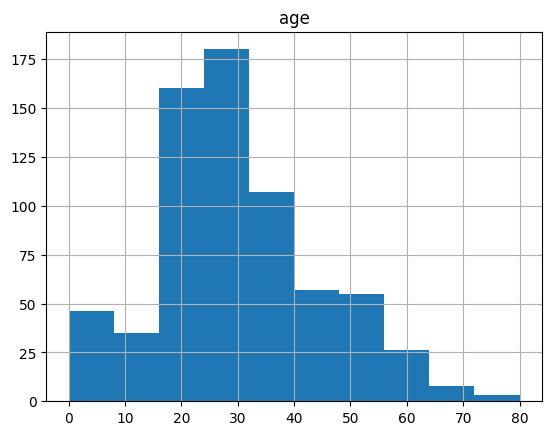

In [100]:
# mengamati dari bentuk histogram
df_titanic.hist('age')

dilihat dari bentuk histogram diatas menunjukkan bentuk skewed sehingga pengisian missing value dilakukan dengan mencari median

In [101]:
median_age = df_titanic['age'].median()
median_age

28.0

In [102]:
df_titanic['age'] = df_titanic['age'].fillna(median_age)

In [103]:
df_titanic.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age               0
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

### Mengatasi Missing Value pada Kolom Fare

array([[<Axes: title={'center': 'fare'}>]], dtype=object)

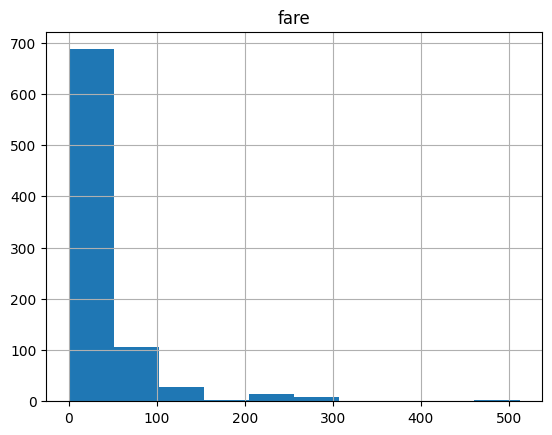

In [104]:
# mengamati dari bentuk histogram
df_titanic.hist('fare')

In [105]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           850 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


Pengisian missing value dilakukan dengan menggunakan median dari data karena persebaran datanya tidak terlalu signifikan dan tipe data dari kolom tersebut menggunkan float dimana dapat dilakukan aggregat

In [106]:
median_fare = df_titanic['fare'].median()
median_fare

14.1083

In [107]:
df_titanic['fare'] = df_titanic['fare'].fillna(median_fare)

In [108]:
df_titanic.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age               0
sibsp             0
parch             0
ticket            0
fare              0
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

### Mengatasi Missing Value Cabin

In [109]:
# mengamati dari jumlah data
# data keseluruhan
len(df_titanic)

850

In [110]:
df_titanic.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age               0
sibsp             0
parch             0
ticket            0
fare              0
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [111]:
df_titanic['cabin'].value_counts()

G6                 4
B57 B59 B63 B66    4
D                  4
B96 B98            4
C22 C26            4
                  ..
C49                1
E52                1
B79                1
C51                1
B37                1
Name: cabin, Length: 135, dtype: int64

melihat dari jumlah data keseluruhan titanic dibandingkan dengan jumlah missing value, data missing value memiliki jumlah yang lebih dari setengah data keseluruhan. Serta apabila dilihat dari value data, elemen yang ada bertumpuk

In [112]:
df_titanic.drop(['cabin'], axis=1, inplace=True)

### Mangatasi Missing Value pada Kolom embarked

In [113]:
# Melihat value data yang null
df_titanic[df_titanic['embarked'].isnull()]

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,survived
109,168,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,6,NaN,NaN,1


In [114]:
df_titanic['embarked'].value_counts()

S    589
C    176
Q     84
Name: embarked, dtype: int64

Pengisian missing value dilakukan dengan modus karena nilai yang muncul cukup signifikan serta data yang missing valau hanya satu data sehingga tidak mempengaruhi bisnis

In [115]:
df_titanic['embarked'] = df_titanic['embarked'].fillna('S')

In [116]:
df_titanic.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age               0
sibsp             0
parch             0
ticket            0
fare              0
embarked          0
boat            542
body            777
home.dest       386
survived          0
dtype: int64

Mengatasi Missing Value pada Kolom Boat

In [117]:
df_titanic['boat'].value_counts()

4          25
C          24
13         23
14         23
15         19
10         18
16         18
9          18
3          16
11         16
7          14
D          14
8          13
6          12
5          12
12         11
A          10
2           9
B           4
1           2
C D         2
5 7         1
5 9         1
13 15       1
13 15 B     1
15 16       1
Name: boat, dtype: int64

Pada kolom boat dilakukan drop karena apabila data diisi maka data yang dimasukkan banyak serta melihat dari persebaran data, data tidak terlalu signifikan dan memiliki value yang bertumpuk serta random

In [118]:
df_titanic.drop(['boat'], axis=1, inplace=True)

In [119]:
df_titanic.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age               0
sibsp             0
parch             0
ticket            0
fare              0
embarked          0
body            777
home.dest       386
survived          0
dtype: int64

### Mengatasi Missing Value pada Kolom Body

In [120]:
len(df_titanic)

850

In [121]:
df_titanic.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age               0
sibsp             0
parch             0
ticket            0
fare              0
embarked          0
body            777
home.dest       386
survived          0
dtype: int64

melihat dari jumlah missing value yang ada terlalu banyak sehingga apabila dilakukan input data pada missing value data akan menjadi data random

In [122]:
df_titanic.drop(['body'], axis=1, inplace=True)

In [123]:
df_titanic.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age               0
sibsp             0
parch             0
ticket            0
fare              0
embarked          0
home.dest       386
survived          0
dtype: int64

### Mengatasi Missing Value pada Kolom home.dest

In [124]:
df_titanic['home.dest'].value_counts()

New York, NY                            36
London                                   7
Cornwall / Akron, OH                     7
Sweden Winnipeg, MN                      6
Wiltshire, England Niagara Falls, NY     6
                                        ..
Toronto, ON                              1
Hartford, CT                             1
Bournemouth, England                     1
?Havana, Cuba                            1
Bronx, NY                                1
Name: home.dest, Length: 272, dtype: int64

apabila data diisi dengan nilai modus yaitu New York, maka data akan berat pada New York sehingga akurasi dari machine learning akan tidak akurat. Sehingga dilakukan drop kolom

In [125]:
df_titanic.drop(['home.dest'], axis=1, inplace=True)

In [126]:
df_titanic.isnull().sum()

passenger_id    0
pclass          0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
embarked        0
survived        0
dtype: int64

# No. 4

In [127]:
url_revenue = '/content/drive/MyDrive/Colab Notebooks/MSIB/Pengenalan Python untuk Data Science/PDA_DataSource/Pengolahan_Data/telecom_revenue.csv'
telecom_revenue = pd.read_csv(url_revenue)
telecom_revenue.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,OverageMinutes,RoamingCalls,Occupation
0,3164846,No,34.91,619.0,18.0,53.0,0.0,Other
1,3203230,Yes,43.24,405.0,40.0,0.0,0.0,Other
2,3371590,No,73.47,1281.0,71.0,0.0,0.0,Other
3,3138302,No,776.27,3978.0,160.0,2278.0,22.9,Other
4,3375774,No,189.20,1474.0,95.0,0.0,0.0,Other


In [128]:
url_usage = '/content/drive/MyDrive/Colab Notebooks/MSIB/Pengenalan Python untuk Data Science/PDA_DataSource/Pengolahan_Data/telecom_usage.csv'
telecom_usage = pd.read_csv(url_usage)
telecom_usage.head()

,CustomerID,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls
0,3389874,0.0,1.0,7.7,0.7
1,3282042,15.3,1.7,152.0,5.7
2,3054454,8.7,0.3,30.3,0.0
3,3091842,6.0,1.7,19.3,0.0
4,3382382,0.7,0.7,5.0,0.0


In [129]:
customer_join = pd.merge(telecom_revenue, telecom_usage, on='CustomerID', how='left')
customer_join

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,OverageMinutes,RoamingCalls,Occupation,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls
0,3164846,No,34.91,619.0,18.0,53.0,0.0,Other,NaN,NaN,NaN,NaN
1,3203230,Yes,43.24,405.0,40.0,0.0,0.0,Other,NaN,NaN,NaN,NaN
2,3371590,No,73.47,1281.0,71.0,0.0,0.0,Other,NaN,NaN,NaN,NaN
3,3138302,No,776.27,3978.0,160.0,2278.0,22.9,Other,NaN,NaN,NaN,NaN
4,3375774,No,189.20,1474.0,95.0,0.0,0.0,Other,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3267618,No,30.14,152.0,40.0,0.0,0.0,Other,NaN,NaN,NaN,NaN
9996,3316790,No,50.61,260.0,58.0,0.0,0.3,Other,1.0,0.7,7.3,1.7
9997,3265178,Yes,87.18,960.0,85.0,0.0,0.0,Other,NaN,NaN,NaN,NaN
9998,3282934,Yes,31.24,134.0,40.0,0.0,0.0,Clerical,NaN,NaN,NaN,NaN


In [130]:
# Df 1
df_1_filter = customer_join[(customer_join['MonthlyRevenue'] > 10) &
                            (customer_join['Occupation'].isin(['Professional', 'Student', 'Crafts']))].reset_index(drop=True)

In [131]:
df_1_filter

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,OverageMinutes,RoamingCalls,Occupation,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls
0,3397170,No,83.51,290.0,93.0,0.0,0.0,Professional,NaN,NaN,NaN,NaN
1,3274822,No,30.83,273.0,40.0,0.0,0.8,Professional,0.0,0.0,0.0,0.0
2,3394258,No,52.72,1501.0,62.0,0.0,0.0,Crafts,NaN,NaN,NaN,NaN
3,3056178,Yes,54.09,412.0,40.0,46.0,0.0,Professional,NaN,NaN,NaN,NaN
4,3065718,No,43.06,110.0,35.0,0.0,3.3,Crafts,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2018,3015822,No,46.10,203.0,38.0,30.0,0.0,Crafts,NaN,NaN,NaN,NaN
2019,3323878,No,44.26,419.0,45.0,2.0,0.0,Professional,NaN,NaN,NaN,NaN
2020,3050290,Yes,51.06,192.0,30.0,74.0,0.0,Professional,NaN,NaN,NaN,NaN
2021,3119258,No,39.49,352.0,45.0,0.0,1.7,Crafts,NaN,NaN,NaN,NaN


In [132]:
mean = df_1_filter[df_1_filter['Churn'] == 'No']['MonthlyRevenue'].mean()

df_2_filter = customer_join[
    (customer_join['CustomerCareCalls'] > 10) &
    (customer_join['MonthlyRevenue'] <= mean)
].reset_index(drop=True)

df_2_filter

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,OverageMinutes,RoamingCalls,Occupation,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls
0,3344578,No,45.63,731.0,40.0,14.0,0.0,Professional,13.0,2.3,35.7,10.7
1,3178106,No,43.26,362.0,30.0,36.0,0.0,Professional,3.3,0.0,13.3,15.3
2,3345794,No,34.99,735.0,45.0,0.0,0.0,Professional,12.3,1.7,56.0,10.3
3,3360210,No,35.56,316.0,30.0,2.0,0.0,Other,5.0,2.7,104.0,18.0
4,3273278,No,37.57,782.0,48.0,0.0,0.0,Other,0.0,1.3,23.0,15.7
5,3022506,Yes,56.63,286.0,60.0,0.0,3.4,Other,10.7,0.3,1.0,12.7
6,3300078,No,50.56,1482.0,60.0,0.0,0.0,Other,26.7,1.0,93.7,19.7
7,3191166,No,42.83,870.0,55.0,9.0,6.3,Other,4.0,0.0,2.3,32.0
8,3115706,No,33.48,346.0,30.0,39.0,0.0,Professional,5.3,3.0,32.3,17.7
9,3228526,No,32.44,102.0,40.0,0.0,2.0,Crafts,3.0,1.0,11.7,11.0


In [133]:
# df 3
df_3_filter = customer_join.loc[[2331, 3165, 3867, 4030, 4570]].reset_index(drop=True)
df_3_filter

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,OverageMinutes,RoamingCalls,Occupation,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls
0,3360210,No,35.56,316.0,30.0,2.0,0.0,Other,5.0,2.7,104.0,18.0
1,3273278,No,37.57,782.0,48.0,0.0,0.0,Other,0.0,1.3,23.0,15.7
2,3022506,Yes,56.63,286.0,60.0,0.0,3.4,Other,10.7,0.3,1.0,12.7
3,3300078,No,50.56,1482.0,60.0,0.0,0.0,Other,26.7,1.0,93.7,19.7
4,3191166,No,42.83,870.0,55.0,9.0,6.3,Other,4.0,0.0,2.3,32.0


In [134]:
# Gabungkan df_1 , df_2 dan df_3 secara union
union = pd.concat([df_1_filter, df_2_filter, df_3_filter], ignore_index=True)
union

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,OverageMinutes,RoamingCalls,Occupation,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls
0,3397170,No,83.51,290.0,93.0,0.0,0.0,Professional,NaN,NaN,NaN,NaN
1,3274822,No,30.83,273.0,40.0,0.0,0.8,Professional,0.0,0.0,0.0,0.0
2,3394258,No,52.72,1501.0,62.0,0.0,0.0,Crafts,NaN,NaN,NaN,NaN
3,3056178,Yes,54.09,412.0,40.0,46.0,0.0,Professional,NaN,NaN,NaN,NaN
4,3065718,No,43.06,110.0,35.0,0.0,3.3,Crafts,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2039,3360210,No,35.56,316.0,30.0,2.0,0.0,Other,5.0,2.7,104.0,18.0
2040,3273278,No,37.57,782.0,48.0,0.0,0.0,Other,0.0,1.3,23.0,15.7
2041,3022506,Yes,56.63,286.0,60.0,0.0,3.4,Other,10.7,0.3,1.0,12.7
2042,3300078,No,50.56,1482.0,60.0,0.0,0.0,Other,26.7,1.0,93.7,19.7


In [135]:
# Pada Occupation apa, Churn rate >= 0.4 ?

In [136]:
# mencari churn rate
telecom_join_group = union.groupby(['Occupation', 'Churn']).agg({'CustomerID' : 'count'}).reset_index()
telecom_join_group.rename(columns={'CustomerID': 'Customers'}, inplace=True)
telecom_join_group

,Occupation,Churn,Customers
0,Clerical,Yes,1
1,Crafts,No,221
2,Crafts,Yes,82
3,Other,No,9
4,Other,Yes,5
5,Professional,No,1215
6,Professional,Yes,443
7,Student,No,43
8,Student,Yes,25


In [137]:
telecom_join_group['total_customers'] = telecom_join_group.groupby('Occupation')['Customers'].transform('sum')
telecom_join_group

,Occupation,Churn,Customers,total_customers
0,Clerical,Yes,1,1
1,Crafts,No,221,303
2,Crafts,Yes,82,303
3,Other,No,9,14
4,Other,Yes,5,14
5,Professional,No,1215,1658
6,Professional,Yes,443,1658
7,Student,No,43,68
8,Student,Yes,25,68


In [139]:
churn_yes = telecom_join_group[telecom_join_group['Churn'] =='Yes']
churn_yes

,Occupation,Churn,Customers,total_customers
0,Clerical,Yes,1,1
2,Crafts,Yes,82,303
4,Other,Yes,5,14
6,Professional,Yes,443,1658
8,Student,Yes,25,68


In [140]:
churn_yes['churn_rate'] = churn_yes['Customers'] / churn_yes['total_customers']
churn_yes

,Occupation,Churn,Customers,total_customers,churn_rate
0,Clerical,Yes,1,1,1.000000
2,Crafts,Yes,82,303,0.270627
4,Other,Yes,5,14,0.357143
6,Professional,Yes,443,1658,0.267189
8,Student,Yes,25,68,0.367647


In [141]:
churn_yes[['Occupation', 'churn_rate']].sort_values('churn_rate', ascending=False)

,Occupation,churn_rate
0,Clerical,1.000000
8,Student,0.367647
4,Other,0.357143
2,Crafts,0.270627
6,Professional,0.267189


In [142]:
# Churn rate >= 0.4 
churn_rate_filter = churn_yes[churn_yes['churn_rate'] >= 0.4]

churn_rate_filter[['Occupation', 'churn_rate']]

,Occupation,churn_rate
0,Clerical,1.0
